# Linear Regression on Boston Dataset for the Data Analytics Session
by Rathachai C.


## 1) To load libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



---



## 2) To load data and check

In [65]:
boston = pd.read_csv('https://rathachai.github.io/DA101/data/boston.csv')

In [66]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [67]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [68]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000




---



## 3) To do data exploration

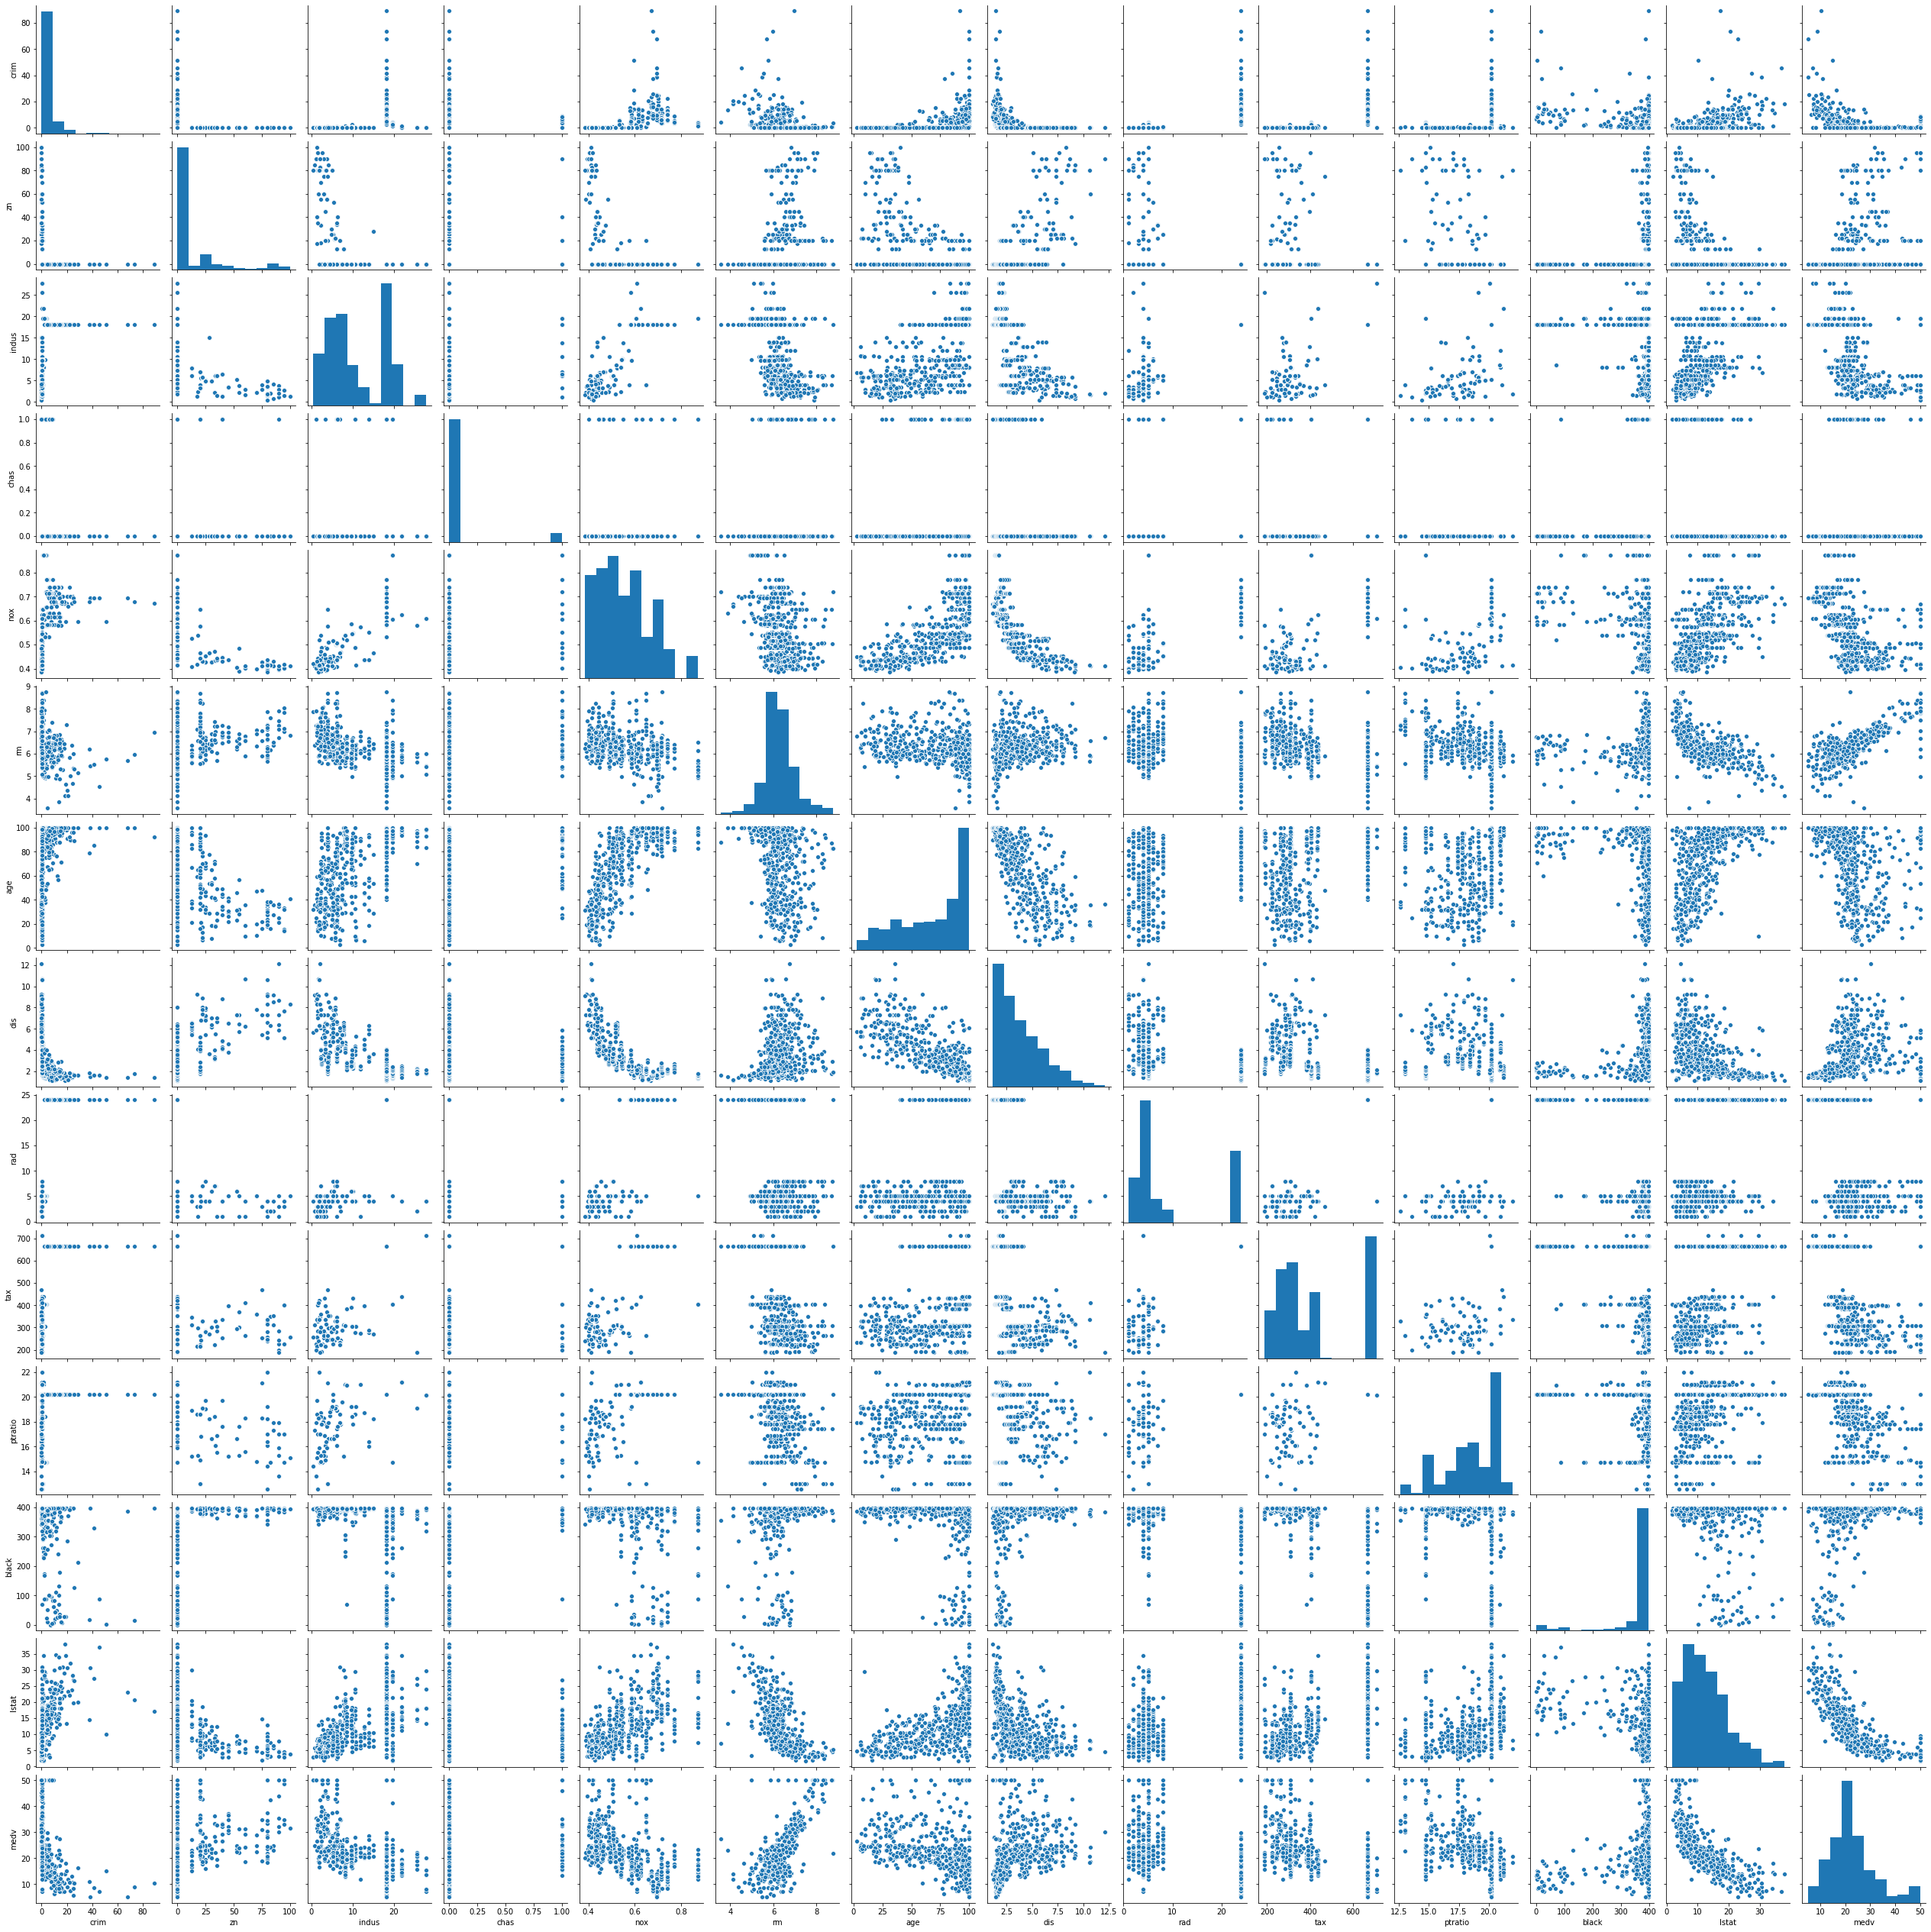

In [69]:
sns.pairplot(boston)

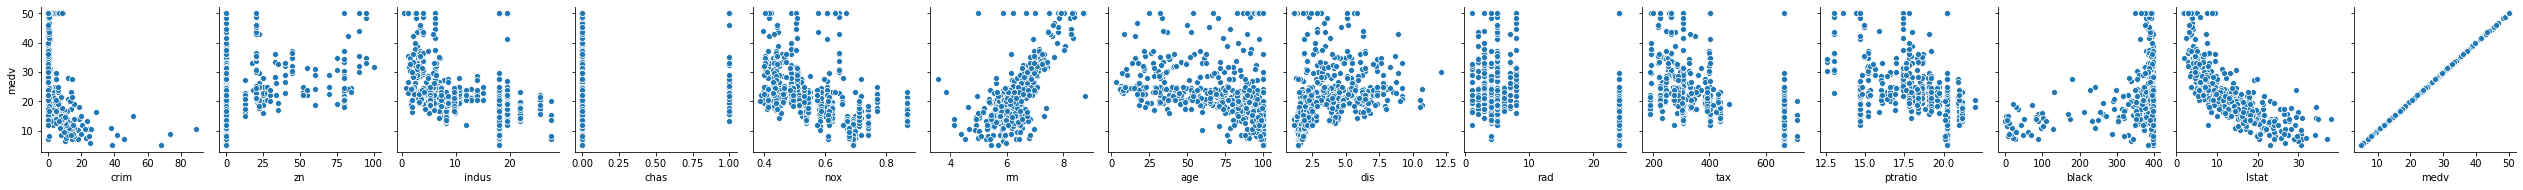

In [70]:
sns.pairplot(boston, x_vars=boston.columns, y_vars=["medv"])

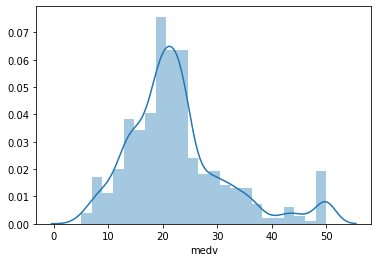

In [71]:
sns.distplot(boston['medv'])



---



## 4) To do feature selection

### 4.1) to check the correlation

In [72]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


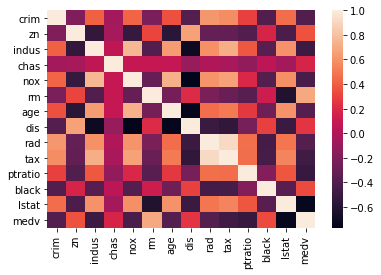

In [73]:
sns.heatmap(boston.corr())

In [74]:
boston.corr().sort_values("medv")["medv"]

lstat     -0.737663
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.388305
rad       -0.381626
age       -0.376955
chas       0.175260
dis        0.249929
black      0.333461
zn         0.360445
rm         0.695360
medv       1.000000
Name: medv, dtype: float64

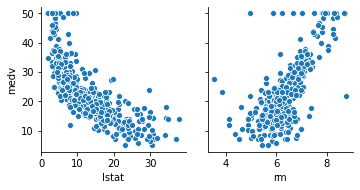

In [75]:
sns.pairplot(boston, x_vars=["lstat","rm"], y_vars=["medv"])

### 4.2) to select data

In [76]:
X = boston[["lstat","rm"]]
y = boston["medv"]

In [77]:
X

,lstat,rm
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [78]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64



---



## 5) To create a Linear Regression Model

### 5.1) to split train and test datasets

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [80]:
y_test

195    50.0
4      36.2
434    11.7
458    14.9
39     30.8
       ... 
78     21.2
160    27.0
124    18.8
167    23.8
272    24.4
Name: medv, Length: 203, dtype: float64

## 5.2) to train and create a linear regression model

In [81]:
lm = LinearRegression()

In [82]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
lm.coef_

array([-0.70994265,  4.04113651])

In [84]:
lm.intercept_

5.7586387935200385



---



## 6) To evaluate the model

### 6.1) to predict from the test set

In [85]:
y_pred = lm.predict(X_test)

In [86]:
y_pred

array([35.47405915, 30.85664713, 20.0761843 , 19.69947079, 29.34298185,
       30.08040004, 37.73052039, 10.1308903 , 30.55761284,  8.67193517,
       27.86195528, 14.29159811, 19.50785006, 24.0062328 , 23.61300587,
       19.80972804,  8.27995474, 31.12076738, 27.81004958, 26.6476192 ,
       12.25462619, 18.40369273, 24.5323439 , 31.36672795, 32.11728675,
       20.94569697, 27.22428466, 20.82117036, 23.19602509, 30.45404545,
       23.93882596, 20.89407454, 33.67334871, 35.5331446 , 23.60311854,
       21.84789741, 19.25579434, 21.03876757,  5.59053515, 28.24814348,
       21.65784443, 25.79244458, 34.82583106, 12.73806041, 19.00005436,
       25.7085145 , 30.31917107, 17.51012821, 27.38113545, 28.75183426,
       32.13529252, 37.48422075, 19.2558434 , 21.84594153, 31.93313576,
       -4.47566061, 18.57637391, 16.09518168, 17.84513789, 18.81579362,
       31.43290302,  1.61197647, 15.09433426, 21.75536083, 12.26967851,
       26.25570437, 24.01778784, 19.99277663, 17.24228627, 20.49

### 6.2) to evaluate with some evaluation methods

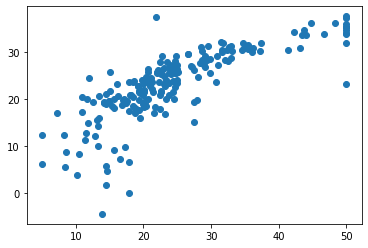

In [87]:
plt.scatter(y_test,y_pred)

In [88]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE = ", rmse)

RMSE =  6.238742389666769


In [89]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE = ", mape, "%")

MAPE =  21.16845297991399 %




---



## Exercises


1.   apply feature scaling (hint: https://scikit-learn.org/stable/modules/preprocessing.html)
2.   work with 5-fold cross-validation  (hint: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
3.   evaluate using RMSE



### **Answer (Q2)**: 5-Fold Cross-Validation

#### step 1: Import useful libraries

In [90]:
from sklearn.model_selection import KFold

#### step 2: Init a K-Fold object

In [91]:
X = boston[["lstat","rm"]]
y = boston["medv"]

In [92]:
k = 5
kf = KFold(n_splits=k)

#### step 3: Do 5-Fold Cross-Validation

In [93]:
round_num = 1
RMSEs = []

for train_index, test_index in kf.split(X):
  print("Round", round_num)
  print("  TRAIN:", train_index[0:10],"...")
  print("  TEST:", test_index[0:5],"...")

  # (5.1) to split train and test datasets
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

  # (5.2) to train and create a linear regression model
  lm = LinearRegression()
  lm.fit(X_train,y_train)

  # (6.1) to predict from the test set
  y_pred = lm.predict(X_test)

  # (6.2) to evaluate with some evaluation methods
  rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  print("  RMSE = ", rmse)
  RMSEs.append(rmse)



  print("------------------------------------")
  round_num+=1

Round 1
  TRAIN: [102 103 104 105 106 107 108 109 110 111] ...
  TEST: [0 1 2 3 4] ...
  RMSE =  3.433481296406468
------------------------------------
Round 2
  TRAIN: [0 1 2 3 4 5 6 7 8 9] ...
  TEST: [102 103 104 105 106] ...
  RMSE =  5.382579259868459
------------------------------------
Round 3
  TRAIN: [0 1 2 3 4 5 6 7 8 9] ...
  TEST: [203 204 205 206 207] ...
  RMSE =  6.916932761257809
------------------------------------
Round 4
  TRAIN: [0 1 2 3 4 5 6 7 8 9] ...
  TEST: [304 305 306 307 308] ...
  RMSE =  8.471749419076826
------------------------------------
Round 5
  TRAIN: [0 1 2 3 4 5 6 7 8 9] ...
  TEST: [405 406 407 408 409] ...
  RMSE =  6.050613943678815
------------------------------------


#### step 5: calculate the mean of errors

In [94]:
print(RMSEs)

[3.433481296406468, 5.382579259868459, 6.916932761257809, 8.471749419076826, 6.050613943678815]


In [95]:
kfold_rmse = np.array(RMSEs).mean()

In [96]:
print("K-Fold CV", "RMSE = ", kfold_rmse)

K-Fold CV RMSE =  6.051071336057675
